<a href="https://colab.research.google.com/github/VietPham1005/LinearRegression/blob/main/Polynominal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Xây dựng mô hình hồi quy không tuyến tính với 1 biến (Polynominal Regression)

#Phương trình có dạng y= an*x^n+b

In [9]:
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [5]:
link='https://drive.google.com/file/d/152LotqU5CNPUbkTokYvY9tOt1bGk9mHG/view?usp=sharing'
#Nguồn data https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv

In [6]:
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)  #Dữ liệu về lương theo cấp bậc của 1 công ty gồm 3 cột Vị trí trong công ty/Cấp bậc/Lương

In [7]:
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X = df.iloc[:, 1:2].values #Biến X là giá trị của cột 2
y = df.iloc[:, 2].values #Biến y là giá trị của cột 3

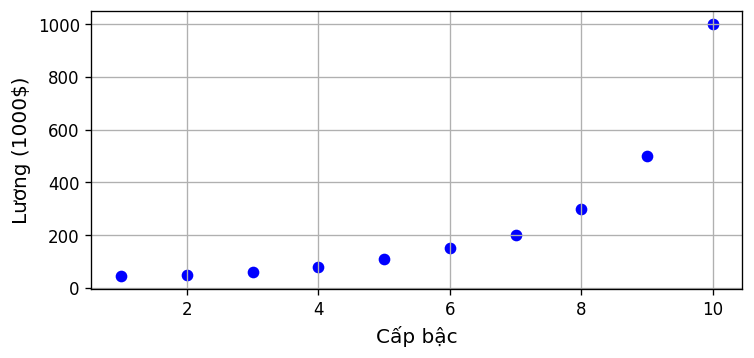

In [10]:
#Vẽ hình thể hiện hai biến x, y
plt.xlabel('Cấp bậc',fontsize=12)
plt.ylabel('Lương (1000$)',fontsize=12)
plt.grid()
plt.scatter(X, y/1000, color='blue', marker='o') #y/1000 đơn vị sẽ là 1000$

In [13]:
#Xây dựng mô hình
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #import thư viện
#1.Gọi mô hình từ thư viện Gán mô hình bằng 1 biến (model)
model_lin=linear_model.LinearRegression()

In [14]:
#Xây dựng mô hình Linear
model_lin=linear_model.LinearRegression()
model_lin.fit(X,y)
y_pred_lin=model_lin.predict(X)

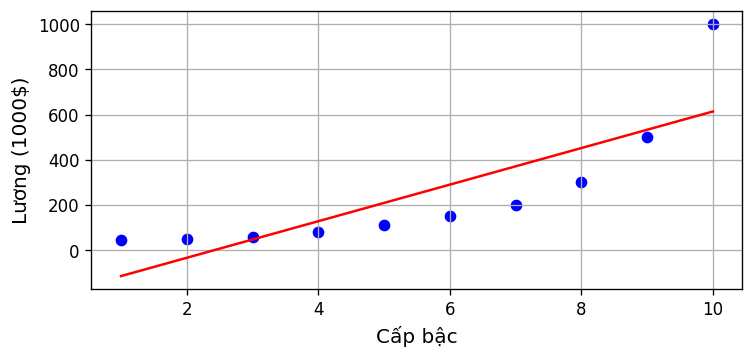

In [15]:
#Vẽ hình thể hiện hai biến x, y
plt.xlabel('Cấp bậc',fontsize=12)
plt.ylabel('Lương (1000$)',fontsize=12)
plt.grid()
plt.scatter(X, y/1000, color='blue', marker='o') #y/1000 đơn vị sẽ là 1000$
plt.plot(X, y_pred_lin/1000, color='red', marker='') #y_pred_lin/1000 đơn vị sẽ là 1000$

In [17]:
#Hình vẽ cho thấy Mô hình Linear không tốt
from sklearn.metrics import r2_score
Ac=r2_score(y, y_pred_lin)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac))

The accuracy of this model is:R-square= 0.67


In [18]:
# Xây dựng mô hình Polynomial
from sklearn.preprocessing import PolynomialFeatures
Poly_reg = PolynomialFeatures(degree=4) #Tạo Polynomial Features bậc 4 (bậc có thể thay đổi tùy vào dữ liệu)
X_poly = Poly_reg.fit_transform(X) # Tạo giá trị của X theo Polynomial Features
model_Pol = LinearRegression() # Thực chất Mô hình Polynomial được tính dựa trên công cụ LinearRegression với dữ liệu X đã được chuyển đổi bởi Polynomial Features
model_Pol.fit(X_poly, y)

LinearRegression()

In [19]:
y_pred_Pol= model_Pol.predict(X_poly)

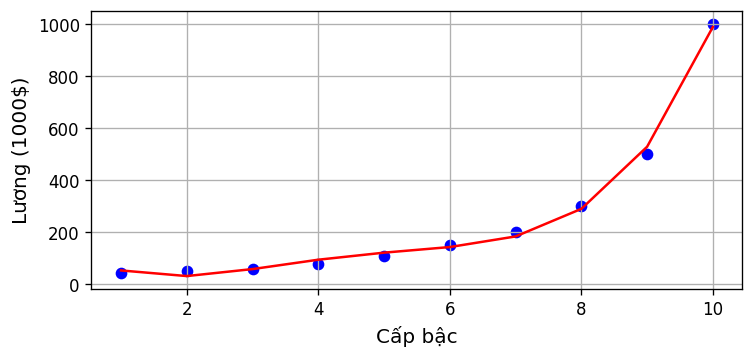

In [20]:
# Hiển thị dữ liệu dự báo và dữ liệu raw
plt.xlabel('Cấp bậc',fontsize=12)
plt.ylabel('Lương (1000$)',fontsize=12)
plt.scatter(X, y/1000, color='blue', marker='o')
plt.plot(X,y_pred_Pol/1000, color='red')
plt.grid()
#Thay đổi bậc của Polynomial để thấy sự thay đổi của đường dự báo

In [21]:
#Độ chính xác tốt hơn rất nhiều so với Linear(0.6)
Ac=r2_score(y, y_pred_Pol)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac))

The accuracy of this model is:R-square= 1.00


In [22]:
from sklearn.metrics import mean_squared_error
import math

In [23]:
rmse=math.sqrt(mean_squared_error(y, y_pred_Pol))
rmse

14503.234909626777

In [24]:
RMSE=[]
for i in range(2,10,1):
  Poly_reg = PolynomialFeatures(degree=i) #Tạo Polynomial Features bậc 4 (bậc có thể thay đổi tùy vào dữ liệu)
  X_poly = Poly_reg.fit_transform(X) # Tạo giá trị của X theo Polynomial Features
  model_Pol = LinearRegression() # Thực chất Mô hình Polynomial được tính dựa trên công cụ LinearRegression với dữ liệu X đã được chuyển đổi bởi Polynomial Features
  model_Pol.fit(X_poly, y)
  y_pred_Pol= model_Pol.predict(X_poly)
  rmse=math.sqrt(mean_squared_error(y, y_pred_Pol))
  RMSE.append(rmse)

In [25]:
RMSE

[82212.12400451249,
 38931.504012329286,
 14503.234909626777,
 4047.5034752653246,
 2018.7783931046406,
 1361.6432712692101,
 724.2423238316622,
 0.03728046893466167]

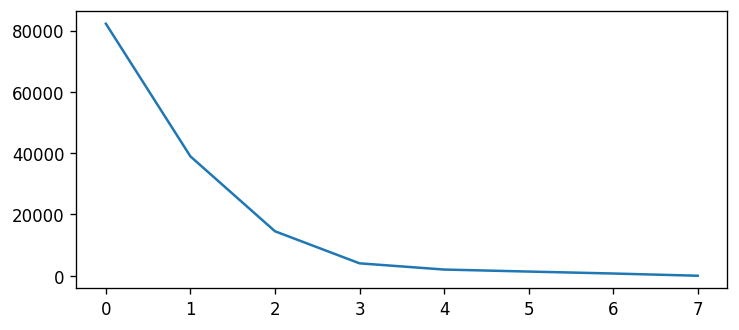

In [26]:
plt.plot(RMSE)